In [74]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA

#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [75]:
import csv 
import sys #used for passing in the argument

data = []
with open("./eigg.csv", 'r') as f:  #opens PW file
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=',')) #reads csv into a list of lists

print(len(data))
print(len(data[0]))
print(data[0])
print(all([len(i) == len(data[0]) for i in data]))

37389
53
['NBN Atlas record ID', 'Occurrence ID', 'Licence', 'Rightsholder', 'Scientific name', 'Common name', 'Species ID (TVK)', 'Taxon Rank', 'Occurrence status', 'Start date', 'Start date day', 'Start date month', 'Start date year', 'End date', 'End date day', 'End date month', 'End date year', 'Locality', 'OSGR', 'Latitude (WGS84)', 'Longitude (WGS84)', 'Coordinate uncertainty (m)', 'Verbatim depth', 'Recorder', 'Determiner', 'Individual count', 'Abundance', 'Abundance scale', 'Organism scope', 'Organism remarks', 'Sex', 'Life stage', 'Occurrence remarks', 'Identification verification status', 'Basis of record', 'Survey key', 'Dataset name', 'Dataset ID', 'Data provider', 'Data provider ID', 'Institution code', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'OSGR 100km', 'OSGR 10km', 'OSGR 2km', 'OSGR 1km', 'Country', 'State/Province']
True


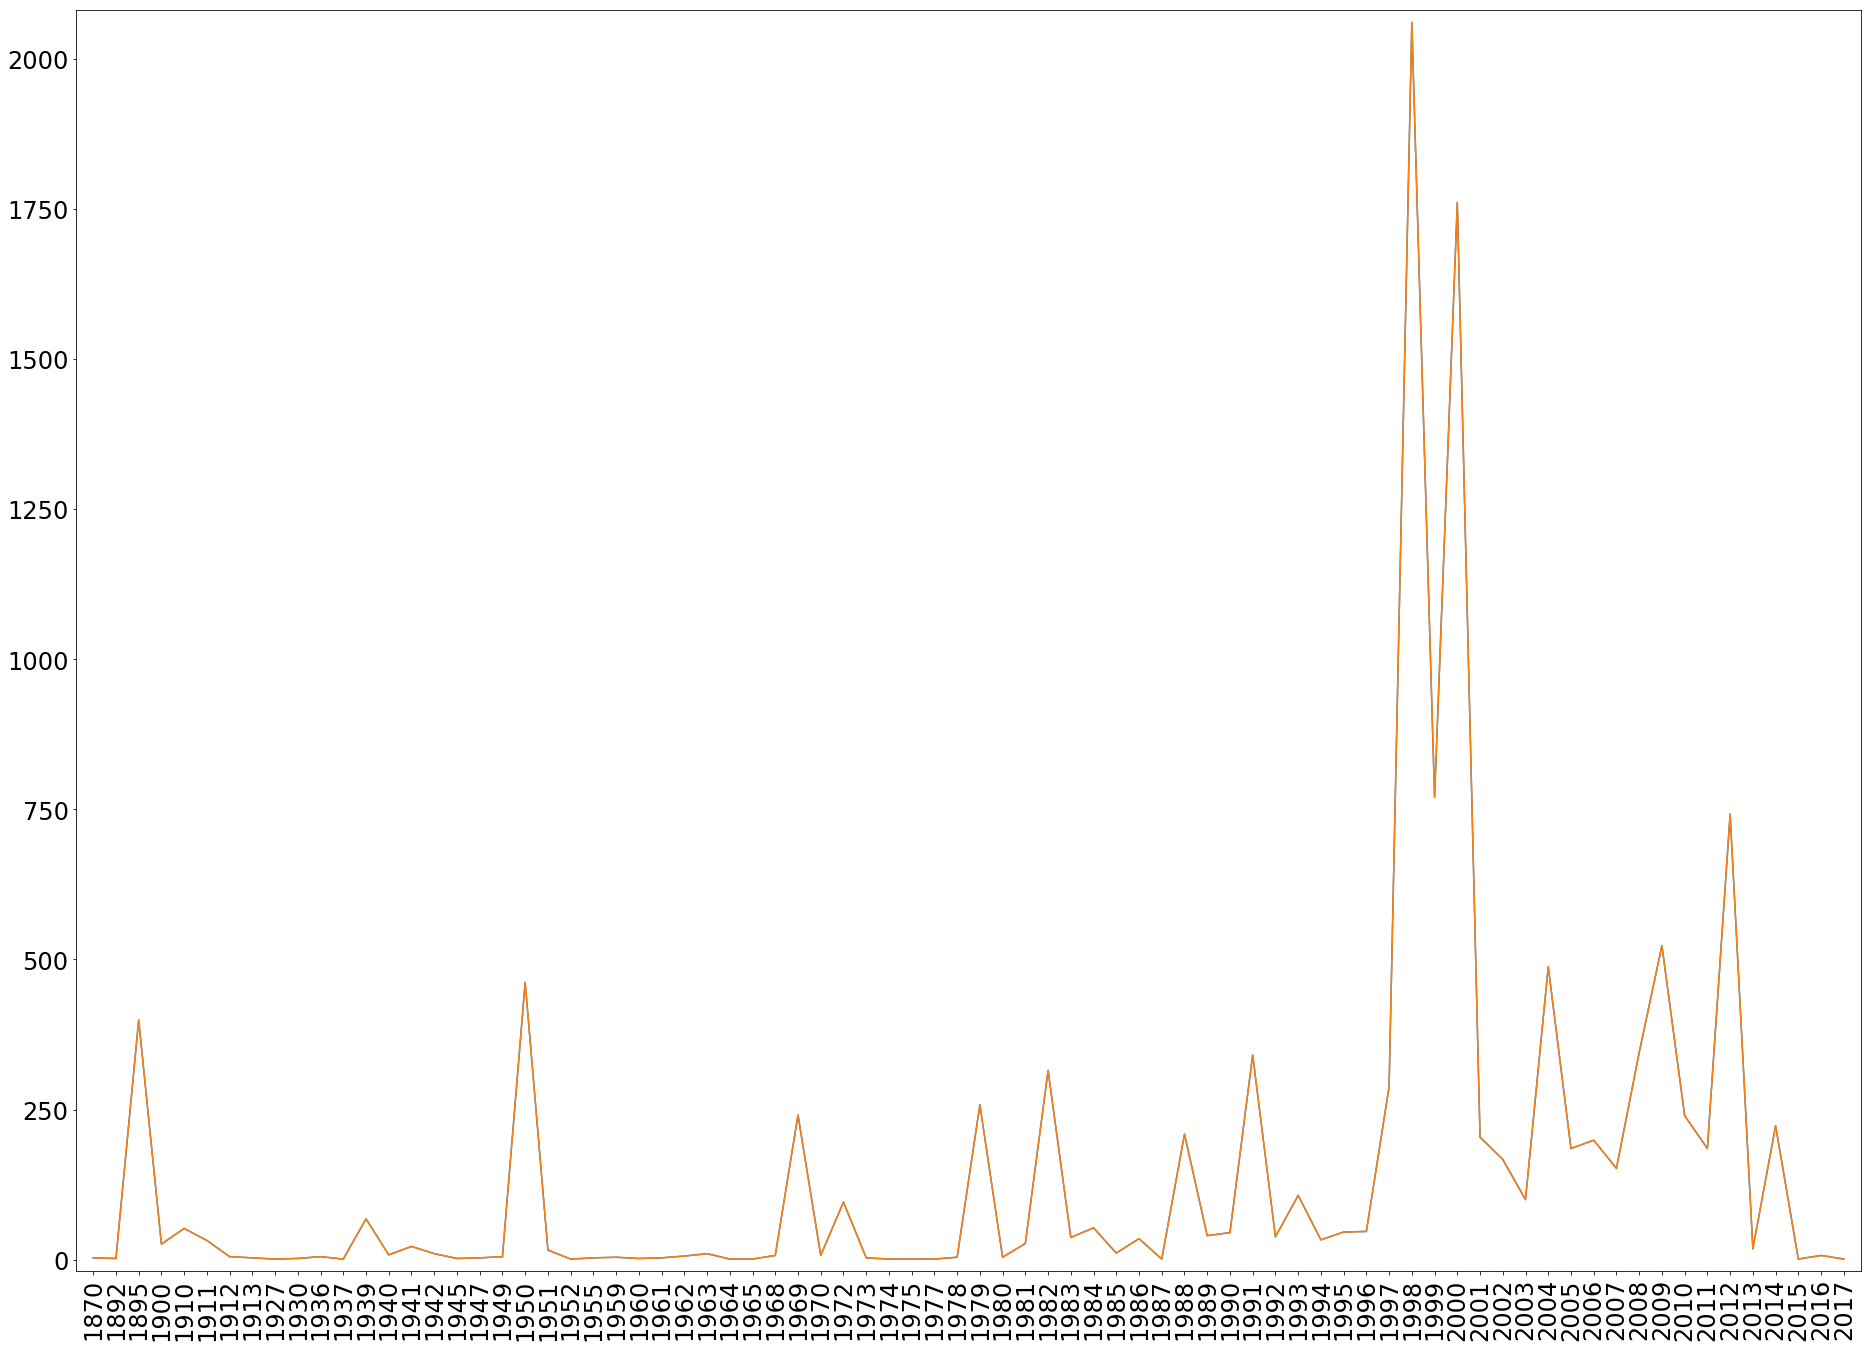

In [76]:
byYear = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYear = list(filter(lambda x: x[0] != '', byYear))

fig = plt.figure()
plt.plot([x[0] for x in byYear], [x[1] for x in byYear])

x = [x[0] for x in byYear]
y = [x[1] for x in byYear]
plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.01)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

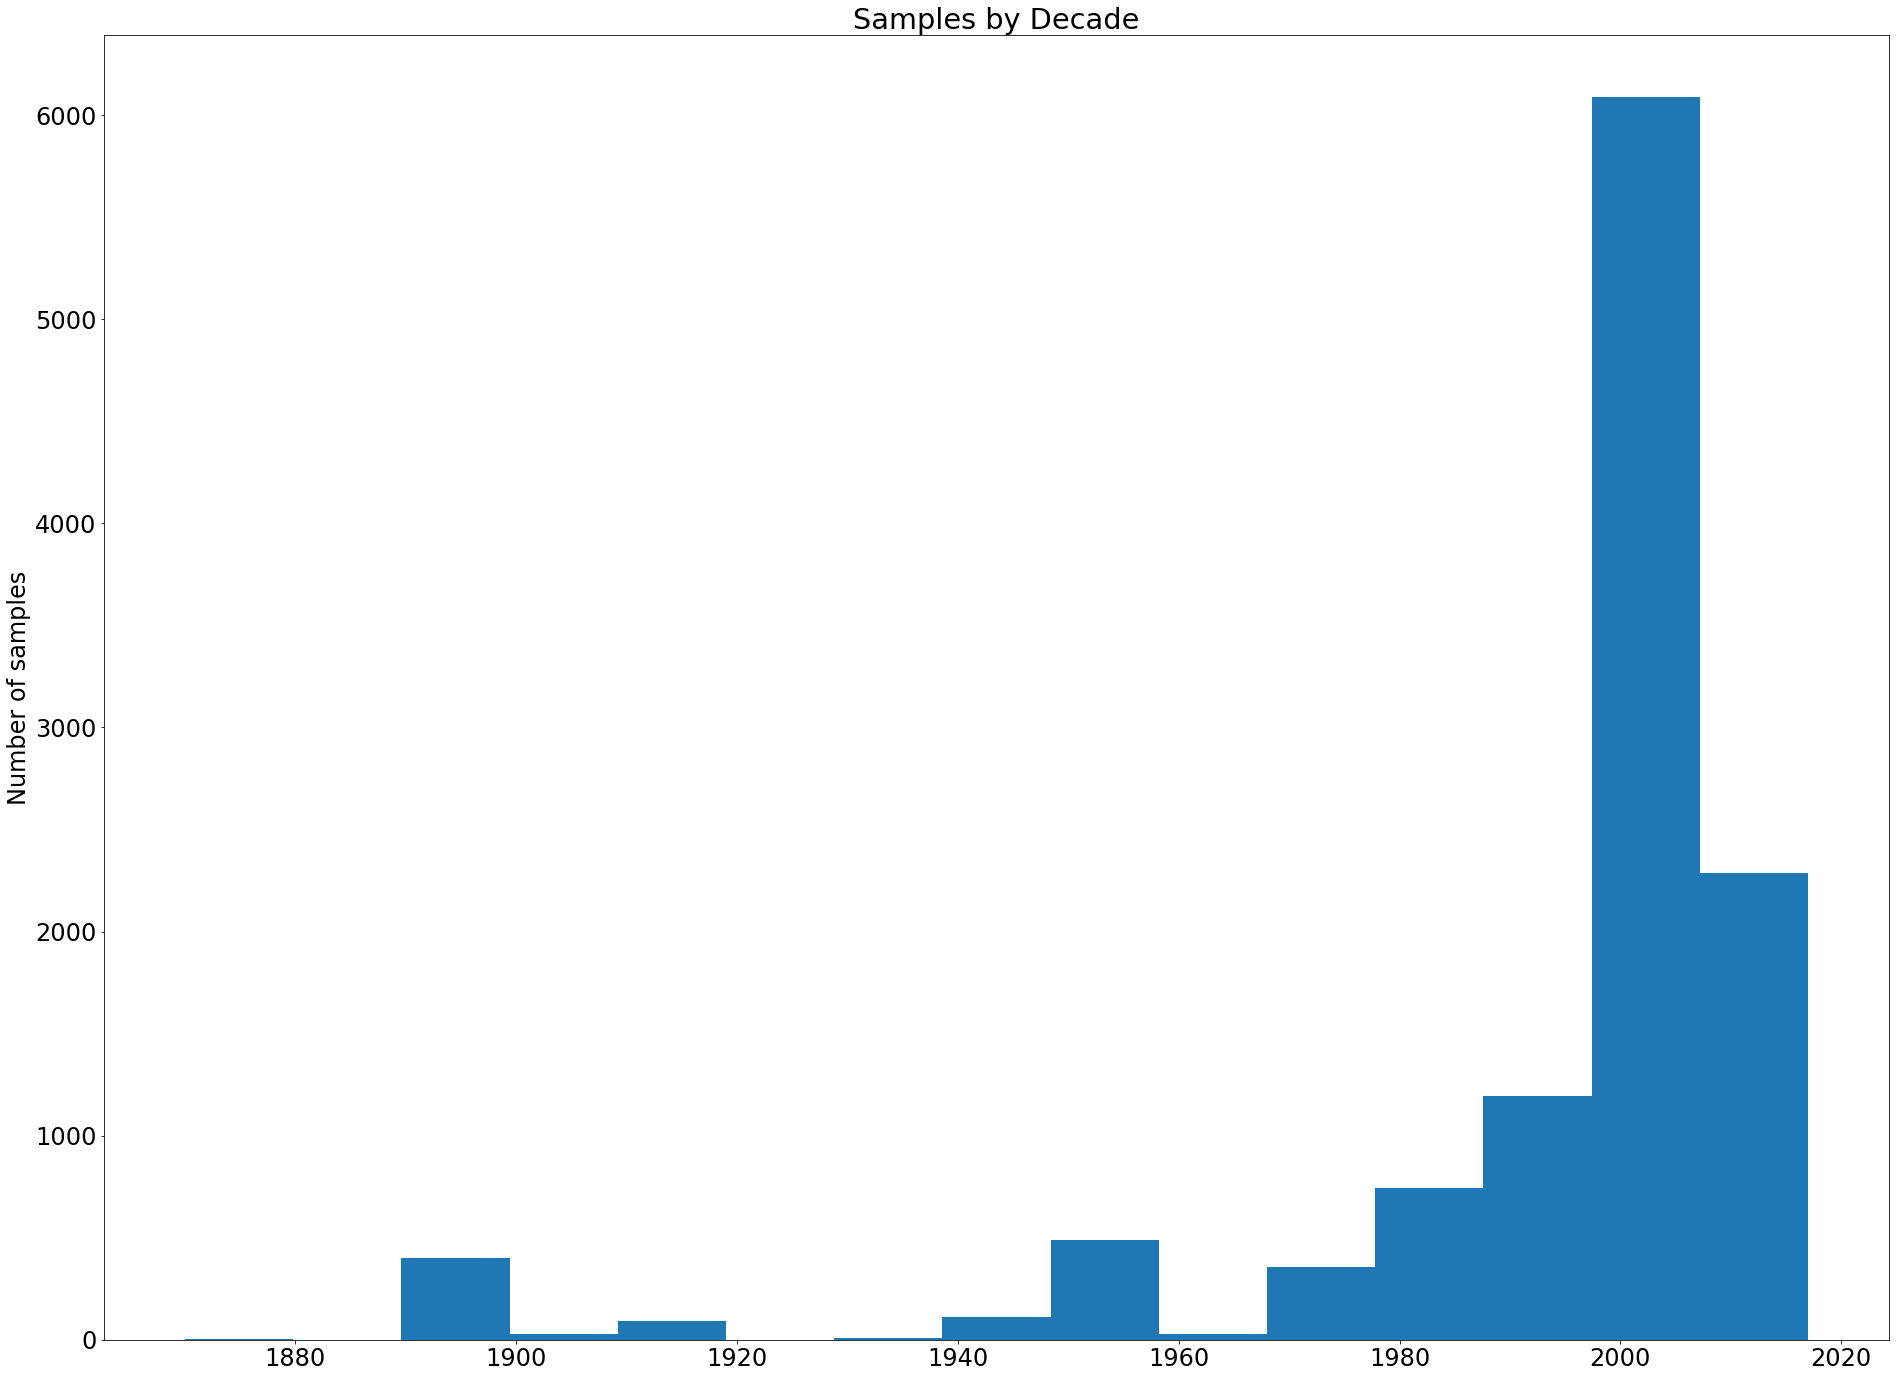

In [78]:
byYearAgg = sorted(list(Counter([i[16] for i in data[1:]]).items()), key=lambda x: x[0])
byYearAgg = list(map(lambda x: [int(x[0])] * x[1], filter(lambda x: x[0] != '', byYear)))
flatList = [item for sublist in byYearAgg for item in sublist]

plt.hist(flatList, bins=15)
plt.gca().set(title='Samples by Decade', ylabel='Number of samples');